# 🎥Netflix TV Show and Movie Recommendation System

### 1. Importing the Libraries

In [33]:
import pandas as pd
import string
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import spacy
import ast

nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')

nlp = spacy.load("en_core_web_sm")

stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\aryag\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\aryag\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\aryag\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### 2. Loading the Data 

In [34]:
df = pd.read_csv("titles.csv")


In [35]:
df

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,51,['documentation'],['US'],1.0,NaN,NaN,NaN,0.600,NaN
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,114,"['drama', 'crime']",['US'],NaN,tt0075314,8.2,808582.0,40.965,8.179
2,tm154986,Deliverance,MOVIE,Intent on seeing the Cahulawassee River before...,1972,R,109,"['drama', 'action', 'thriller', 'european']",['US'],NaN,tt0068473,7.7,107673.0,10.010,7.300
3,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['fantasy', 'action', 'comedy']",['GB'],NaN,tt0071853,8.2,534486.0,15.461,7.811
4,tm120801,The Dirty Dozen,MOVIE,12 American military prisoners in World War II...,1967,NaN,150,"['war', 'action']","['GB', 'US']",NaN,tt0061578,7.7,72662.0,20.398,7.600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5845,tm1014599,Fine Wine,MOVIE,A beautiful love story that can happen between...,2021,NaN,100,"['romance', 'drama']",['NG'],NaN,tt13857480,6.8,45.0,1.466,NaN
5846,tm898842,C/O Kaadhal,MOVIE,A heart warming film that explores the concept...,2021,NaN,134,['drama'],[],NaN,tt11803618,7.7,348.0,NaN,NaN
5847,tm1059008,Lokillo,MOVIE,A controversial TV host and comedian who has b...,2021,NaN,90,['comedy'],['CO'],NaN,tt14585902,3.8,68.0,26.005,6.300
5848,tm1035612,Dad Stop Embarrassing Me - The Afterparty,MOVIE,"Jamie Foxx, David Alan Grier and more from the...",2021,PG-13,37,[],['US'],NaN,NaN,NaN,NaN,1.296,10.000


In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

def visualize_raw_data(df):
    """
    Visualizes general trends in the movie dataset.
    """

    plt.figure(figsize=(15, 10))


    plt.subplot(2, 2, 1)
    # Convert the string representation of a list to an actual list
    genre_counts = Counter([g for genre_list in df['genres'].dropna() for g in ast.literal_eval(genre_list)])
    top_genres = dict(sorted(genre_counts.items(), key=lambda x: x[1], reverse=True)[:10])  # Top 10
    sns.barplot(x=list(top_genres.keys()), y=list(top_genres.values()), palette="viridis")
    plt.xticks(rotation=45)
    plt.ylabel("Count")
    plt.title("Top 10 Most Common Genres")


    # ✅ (2) Production Countries Distribution
    plt.subplot(2, 2, 2)
    country_counts = Counter([c for country_list in df['production_countries'].dropna() for c in country_list.split(', ')])
    top_countries = dict(sorted(country_counts.items(), key=lambda x: x[1], reverse=True)[:5])  # Top 5
    plt.pie(top_countries.values(), labels=top_countries.keys(), autopct="%1.1f%%", colors=sns.color_palette("pastel"))
    plt.title("Top 5 Movie-Producing Countries")

    # ✅ (3) Movie Length Distribution
    plt.subplot(2, 2, 3)
    sns.histplot(df['runtime'].dropna(), bins=30, kde=True, color="blue")
    plt.xlabel("Runtime (minutes)")
    plt.ylabel("Number of Movies")
    plt.title("Distribution of Movie Runtimes")

    # ✅ (4) Cosine Similarity Heatmap (if tf-idf matrix exists)
    if 'cosine_similarity' in df.columns:
        plt.subplot(2, 2, 4)
        similarity_matrix = df[['cosine_similarity']].dropna().values.reshape(-1, 1)  # Reshape for heatmap
        sns.heatmap(similarity_matrix, cmap="coolwarm", cbar=True)
        plt.title("Cosine Similarity Distribution")

    plt.tight_layout()
    plt.show()


C:\Users\aryag\AppData\Local\Temp\ipykernel_20420\3877614347.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(top_genres.keys()), y=list(top_genres.values()), palette="viridis")


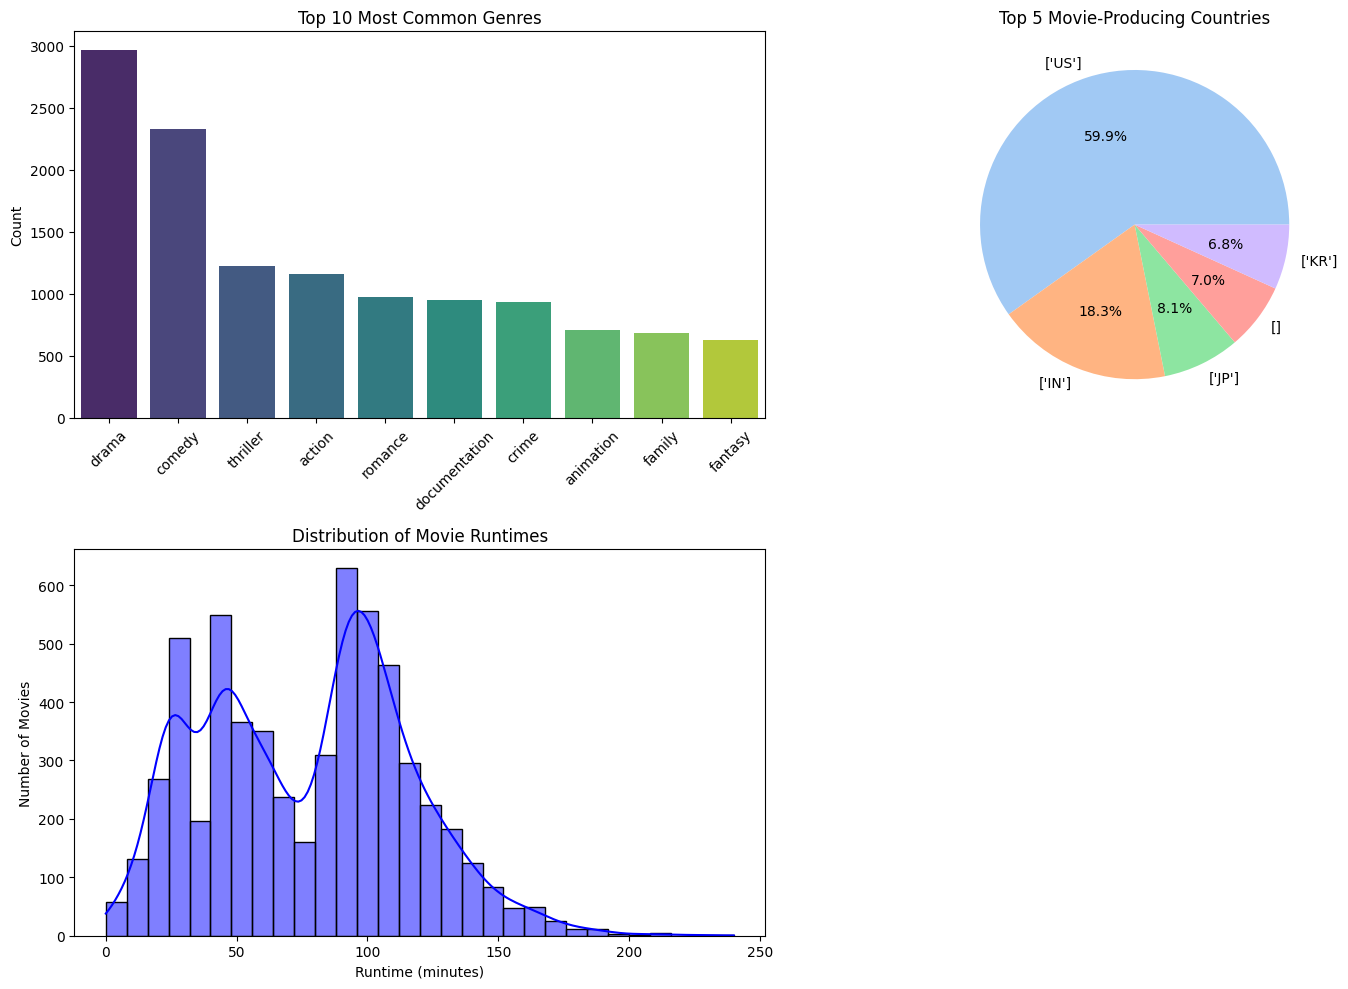

In [37]:
visualize_raw_data(df)


In [38]:
# For 'release_year'
print("Unique counts for 'release_year':")
print(df['release_year'].value_counts())
print("-" * 50)



Unique counts for 'release_year':
release_year
2019    836
2020    814
2021    787
2018    773
2017    563
       ... 
1971      1
1977      1
1958      1
1978      1
1963      1
Name: count, Length: 63, dtype: int64
--------------------------------------------------


### 3. Preprocessing Data

In [39]:
df['genres'] = df['genres'].apply(ast.literal_eval)
df['production_countries'] = df['production_countries'].apply(ast.literal_eval)

In [40]:
unique_values = df['genres'].explode().unique()


In [41]:
unique_values

array(['documentation', 'drama', 'crime', 'action', 'thriller',
       'european', 'fantasy', 'comedy', 'war', 'romance', 'western',
       'history', 'music', 'family', 'horror', 'scifi', 'animation',
       'reality', 'sport', nan], dtype=object)

In [42]:
def preprocess(text):
    if pd.isna(text) or not isinstance(text, str):  # Skip null or non-string values
        return ''
    
    text = text.lower()  # Lowercase
    text = text.translate(str.maketrans('', '', string.punctuation))  # Remove punctuation
    words = word_tokenize(text)  # Tokenization
    words = [word for word in words if word not in stop_words]  # Remove stopwords
    return ' '.join(words)


In [43]:
GENRE_LIST = ['documentation', 'drama', 'crime', 'action', 'thriller',
       'european', 'fantasy', 'comedy', 'war', 'romance', 'western',
       'history', 'music', 'family', 'horror', 'scifi', 'animation',
       'reality', 'sport']

def extract_genres_from_query(user_query):
    doc = nlp(user_query.lower())
    extracted_genres = set()
    for token in doc:
        for genre in GENRE_LIST:
            if genre.lower() in token.text:
                extracted_genres.add(genre)
    return list(extracted_genres)

In [44]:
df['content']= df['title']+df['description']
df['processed_content'] = df['content'].apply(preprocess)

In [45]:
vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = vectorizer.fit_transform(df['processed_content'].fillna(''))

### 4. TfIDF and cosine similarity

In [46]:
def hybrid_recommend(df, user_query, user_country=None, num_recommendations=10):
    """
    Hybrid Recommendation:
    1. Compute Cosine Similarity
    2. Show Top 5 Movies Based on Pure Cosine Similarity
    3. Show Next 5 Movies Based on Weighted Score (70% Cosine, 30% Genre Match)
    4. Handle Optional Country Filtering
    """

    # ✅ (A) Compute Cosine Similarity
    query_vector = vectorizer.transform([preprocess(user_query)])
    cosine_sim = cosine_similarity(query_vector, tfidf_matrix)

    # ✅ (B) Extract Genres from User Query (Only for Scoring)
    extracted_genres = extract_genres_from_query(user_query)
    print(f"📌 Detected Genres: {extracted_genres}")

    # ✅ (C) Compute Cosine Similarity Scores
    df_copy = df.copy()
    df_copy['cosine_similarity'] = cosine_sim[0]  # Assign similarity scores

    # ✅ (D) Compute Genre Match Score (1 if any genre matches, else 0) - No Filtering
    df_copy['genre_match'] = df_copy['genres'].apply(lambda x: 1 if any(genre in x for genre in extracted_genres) else 0)

    # ✅ (E) Compute Final Weighted Score
    df_copy['final_score'] = (0.7 * df_copy['cosine_similarity']) + (0.3 * df_copy['genre_match'])

    # ✅ (F) Country Filtering (if provided)
    if user_country and user_country.lower() not in ["any", ""]:
        df_copy = df_copy[df_copy['production_countries'].apply(lambda x: user_country in x)]

    # ✅ (G) Get Top 5 Movies Based on Pure Cosine Similarity
    top_5_cosine = df_copy.nlargest(5, 'cosine_similarity')

    # ✅ (H) Get Next 5 Movies Based on Weighted Score (excluding top 5)
    remaining_df = df_copy.drop(top_5_cosine.index)  # Remove top 5 from selection
    top_5_weighted = remaining_df.nlargest(5, 'final_score')

    # ✅ (I) Combine Results
    final_recommendations = pd.concat([top_5_cosine, top_5_weighted])

    return final_recommendations[['title', 'genres', 'production_countries', 'description']]


### 5. Results

In [49]:
# ✅ Example Query
user_query = "I love space action movies"
user_country = ""

recommendations = hybrid_recommend(df, user_query, user_country, num_recommendations=10)

# 📢 Print recommendations in a well-formatted way
print("\n🔍 Top 10 Recommendations:\n")
for i, (_, row) in enumerate(recommendations.iterrows(), start=1):
    print(f"{i}. 🎬 {row['title']}")
    print(f"      📖 {row['description']}")
    print(f"      🌎 {row['production_countries']}")
    print(f"      🎭 Genres: {', '.join(row['genres'])}")
    print("-" * 50)  # Separator for readability


📌 Detected Genres: ['action']

🔍 Top 10 Recommendations:

1. 🎬 A StoryBots Space Adventure
      📖 Join the StoryBots and the space travelers of the historic Inspiration4 mission as they search for answers to kids' questions about space.
      🌎 []
      🎭 Genres: animation
--------------------------------------------------
2. 🎬 The Wonderful: Stories from the Space Station
      📖 In unusual circumstances, scientists from different countries work together to achieve a common scientific goal. Locked in their spinning space lab, they are isolated from the world — family and friends - and can only watch from the outside as life on Earth continues without them. The space station is a monument not only to the weaknesses of humanity, but also to its ability to do the impossible for the sake of life in space.
      🌎 ['US']
      🎭 Genres: documentation
--------------------------------------------------
3. 🎬 Fukrey Boyzzz: Space Mein Fukrapanti
      📖 Delhi Boys Going To Space
      🌎 []
  

### Monthly Salary Expectations 3000-5000